### Computer Graphics: Barycentric coordinates and texture mapping for triangles
###### by Hamed Shah-hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# vertices contains the three vertices of triangle
# each vertex is a row of two columns
# function returns points inside with their bary. coords.
def triangle_points_barys(vertices):
    coords=np.asarray(vertices)
    points=[]; barys=[]
    xmin,xmax=int(coords[:,0].min()),int(coords[:,0].max())
    ymin,ymax=int(coords[:,1].min()),int(coords[:,1].max())
    x0,y0=coords[0,:];x1,y1=coords[1,:];x2,y2=coords[2,:]
    detA=(x1*y2-x2*y1)-(x0*y2-x2*y0)+(x0*y1-x1*y0)
    if detA==0: #vertices are on a line
        return None,None
    # formulas of landa's are based on Cramer's rule
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            landa0=(x1*y2-x2*y1)-(x*y2-x2*y)+(x*y1-x1*y)
            landa1=(x*y2-x2*y)-(x0*y2-x2*y0)+(x0*y-x*y0)
            landa2=(x1*y-x*y1)-(x0*y-x*y0)+(x0*y1-x1*y0)
            landa0/=detA; landa1/=detA; landa2/=detA
            # check if the point is inside or outside
            if landa0<0 or landa1<0 or landa2<0: continue
            points.append([x,y])
            barys.append([landa0,landa1,landa2])
    return np.asarray(points),np.asarray(barys)

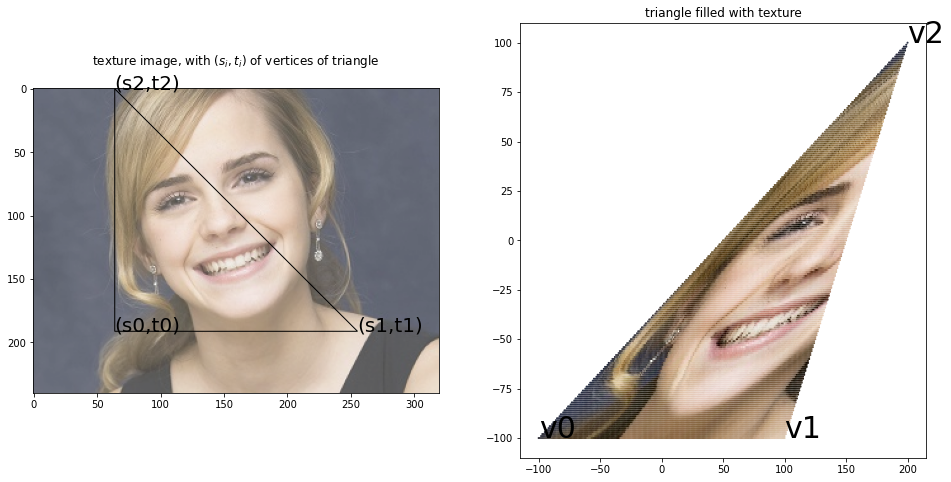

In [9]:
#texture mapping with barycentric coordinates
# three vertices of the triangle
vertices=100*np.array([[-1,-1],[1,-1],[2,1]])
#texture coordinates (s,t) for vertices
assignments={0:[.2,.8],1:[.8,.8],2:[.2,0]}
#loading the texture
image=plt.imread('./images/emma-watson-small.jpg')
img_h,img_w=image.shape[:2]
#points inside triangle with their barycentrics
ps,bs=triangle_points_barys(vertices)
cs=[]
st=np.zeros(2) #s for x, t for y
for id in range(ps.shape[0]):
    landas=bs[id]; st.fill(0.)
    for i in range(3):
        st+=landas[i]*np.array(assignments[i])
    st*=np.array([img_w-1,img_h-1])
    xy=np.round(st).astype('int')
    cs.append(image[xy[1],xy[0]].copy())
cs=np.asarray(cs); vertex_on_images=[]
for assign in assignments:
    vertex_on_images.append(assignments[assign])
vertex_on_images=np.asarray(vertex_on_images)
vertex_on_images*=np.array([img_w-1,img_h-1])
plt.figure(figsize=(16,8)); plt.subplot(121)
plt.imshow(image,alpha=.7)
plt.title('texture image, with $(s_i,t_i)$'+
          ' of vertices of triangle\n')
for i,(x,y) in enumerate(vertex_on_images):
    plt.text(x,y,f'(s{i},t{i})',fontsize=20)
p1=plt.Polygon(vertex_on_images,fill=False)
plt.gca().add_patch(p1); plt.subplot(122)
plt.scatter(ps[:,0],ps[:,1],c=cs/255,s=1)
for i,(x,y) in enumerate(vertices):
    plt.text(x,y,f'v{i}',fontsize=30)
plt.title('triangle filled with texture')
plt.show()